In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [56]:
df = pd.read_csv(r"E:/Nhap mon hoc may/CSV/Dataset-main/Loan Eligibility Prediction.csv")

In [57]:
df.head(10)


,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
5,148,Male,Yes,1,Graduate,No,1538,1425.0,30,360,1,Urban,Y
6,271,Female,No,0,Graduate,No,3237,0.0,30,360,1,Urban,Y
7,29,Male,No,0,Not Graduate,No,1442,0.0,35,360,1,Urban,N
8,583,Female,Yes,0,Graduate,No,3166,0.0,36,360,1,Semiurban,Y
9,510,Female,No,1,Graduate,No,13262,0.0,40,360,1,Urban,Y


In [58]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


(614, 13)

In [59]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


Count: Tổng số dòng của một cột 
Mean: giá trị trung bình của từng cột 
std: phân phối chuẩn của từng cột min: 
Giá trị thấp nhất của từng cột
25% , 50% , 75%, max: lần lượt là khoảng của từng cột đạt được


In [60]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

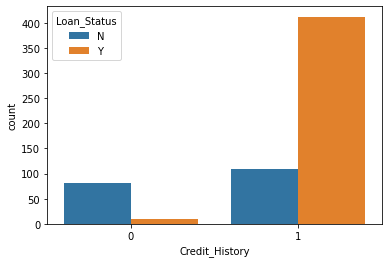

In [89]:
# Loan_Status & Credit_History
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

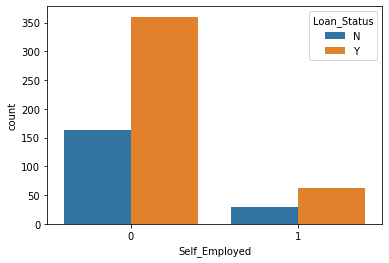

In [106]:
# Loan_Status & Self_Employed
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

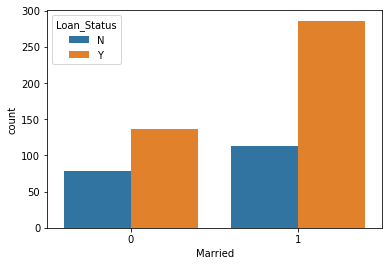

In [107]:
# Loan_Status & Married
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

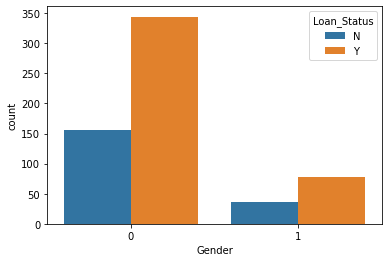

In [108]:
# Loan_Status & Gender
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

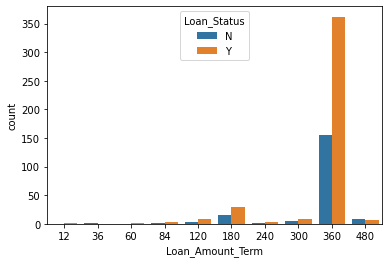

In [109]:
# Loan_Status & Loan_Amount_Term
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

# Nhận giá trị duy nhất (lớp hoặc nhãn) trong biến y

In [61]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [62]:
df.groupby("Loan_Status").mean()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,
N,304.406250,0.864583,5446.078125,1877.807292,143.869792,339.562500,0.572917
Y,308.907583,0.853081,5384.068720,1504.516398,141.182464,338.587678,0.976303


# Nhận danh mục và số lượng phân loại của biến

In [63]:
df['Gender'].value_counts()

Male      499
Female    115
Name: Gender, dtype: int64

In [64]:
df['Married'].value_counts()

Yes    399
No     215
Name: Married, dtype: int64

In [65]:
df['Dependents'].value_counts()

0    351
2    110
1    102
4     51
Name: Dependents, dtype: int64

In [66]:
df['Self_Employed'].value_counts()

No     523
Yes     91
Name: Self_Employed, dtype: int64

In [67]:
df['Applicant_Income'].value_counts()

2500    9
6000    6
2600    6
4583    6
5000    5
       ..
4124    1
2750    1
6045    1
4188    1
2492    1
Name: Applicant_Income, Length: 505, dtype: int64

In [68]:
df['Coapplicant_Income'].value_counts()

0.0       273
2083.0      5
2500.0      5
1666.0      5
1625.0      3
         ... 
1280.0      1
4300.0      1
2253.0      1
2034.0      1
3800.0      1
Name: Coapplicant_Income, Length: 287, dtype: int64

In [69]:
df['Loan_Amount'].value_counts()

120    20
110    17
100    15
160    12
187    12
       ..
58      1
59      1
196     1
61      1
10      1
Name: Loan_Amount, Length: 208, dtype: int64

In [70]:
df['Loan_Amount_Term'].value_counts()

360    517
180     44
480     15
300     13
120     12
240      4
84       4
36       2
60       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [71]:
df['Credit_History'].value_counts()

1    522
0     92
Name: Credit_History, dtype: int64

In [72]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [73]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Gán giá trị cho biến

In [74]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace = True)

In [75]:
df.replace({'Married':{'No':0,'Yes':1}},inplace = True)

In [76]:
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace = True)

In [77]:
df.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace = True)

In [78]:
df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':1}},inplace = True)

# Xác định y (phụ thuộc hoặc nhãn hoặc biến mục tiêu) và X (biến độc lập hoặc tính năng hoặc thuộc tính)

In [95]:
y = df['Loan_Status']
y.shape

(614,)

In [96]:
y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
609    N
610    N
611    N
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [102]:
X =df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History', 'Property_Area']]

In [103]:
X = df.drop(['Customer_ID', 'Loan_Status'],axis=1)

In [104]:
X.shape

(614, 11)

In [105]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,2378,0.0,9,360,1,1
1,0,1,2,1,0,1299,1086.0,17,120,1,1
2,0,0,0,0,0,3620,0.0,25,120,1,1
3,0,1,0,1,1,3459,0.0,25,120,1,1
4,0,1,1,1,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,2947,1603.0,10,360,1,1
610,0,0,0,1,0,4680,2087.0,15,360,1,1
611,0,1,2,1,1,6633,0.0,25,360,0,0
612,0,1,1,0,0,2492,2375.0,30,360,1,0


# Chuẩn hóa biến X


Chuẩn hóa dữ liệu: Chuẩn hóa dữ liệu là một quy trình xử lý dữ liệu nhằm chuyển đổi cấu trúc của các bộ dữ liệu khác nhau thành một định dạng chung của dữ liệu. Nó xử lý việc chuyển đổi bộ dữ liệu sau khi dữ liệu được thu thập từ các nguồn khác nhau và trước khi nó được tải vào các hệ thống .

In [31]:
X_std = X[['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']]

In [32]:
#from sklearn.preprocessing import StandardScaler

In [33]:
#ss = StandardScaler()

In [34]:
#X_std = ss.fit_transform(X_std)

In [35]:
X_std

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term
0,2378,0.0,9,360
1,1299,1086.0,17,120
2,3620,0.0,25,120
3,3459,0.0,25,120
4,5468,1032.0,26,360
...,...,...,...,...
609,2947,1603.0,10,360
610,4680,2087.0,15,360
611,6633,0.0,25,360
612,2492,2375.0,30,360


In [36]:
X_std.shape

(614, 4)

In [37]:
X[['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']] = pd.DataFrame(X_std, columns =['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term'])

In [38]:
X.head(50)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,2378,0.0,9,360,1,1
1,0,1,2,1,0,1299,1086.0,17,120,1,1
2,0,0,0,0,0,3620,0.0,25,120,1,1
3,0,1,0,1,1,3459,0.0,25,120,1,1
4,0,1,1,1,0,5468,1032.0,26,360,1,1
5,0,1,1,1,0,1538,1425.0,30,360,1,1
6,1,0,0,1,0,3237,0.0,30,360,1,1
7,0,0,0,0,0,1442,0.0,35,360,1,1
8,1,1,0,1,0,3166,0.0,36,360,1,1
9,1,0,1,1,0,13262,0.0,40,360,1,1


# Chia tập Train và Test


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, stratify = y, random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))


# Huấn luyện Model

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(max_depth=3, random_state=2529) 

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2529)

# Dự đoán mô hình

In [45]:
y_pred = dt.predict(X_test)

In [46]:
y_pred.shape

(185,)

In [47]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y

# Lấy xác xuất của mỗi lớp dự đoán

In [48]:
dt.predict_proba(X_test)

array([[0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.97222222, 0.02777778],
       [0.86363636, 0.13636364],
       [0.16666667, 0.83333333],
       [0.86363636, 0.13636364],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.86363636, 0.13636364],
       [0.30434783, 0.69565217],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.97222222, 0.02777778],
       [0.16666667, 0.83333333],
       [0.86363636, 0.13636364],
       [0.

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print(confusion_matrix(y_test,y_pred))

[[ 29  29]
 [  6 121]]


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.83      0.50      0.62        58
           Y       0.81      0.95      0.87       127

    accuracy                           0.81       185
   macro avg       0.82      0.73      0.75       185
weighted avg       0.81      0.81      0.80       185



# Mo hình Decision Tree 

In [52]:
from sklearn.tree import plot_tree

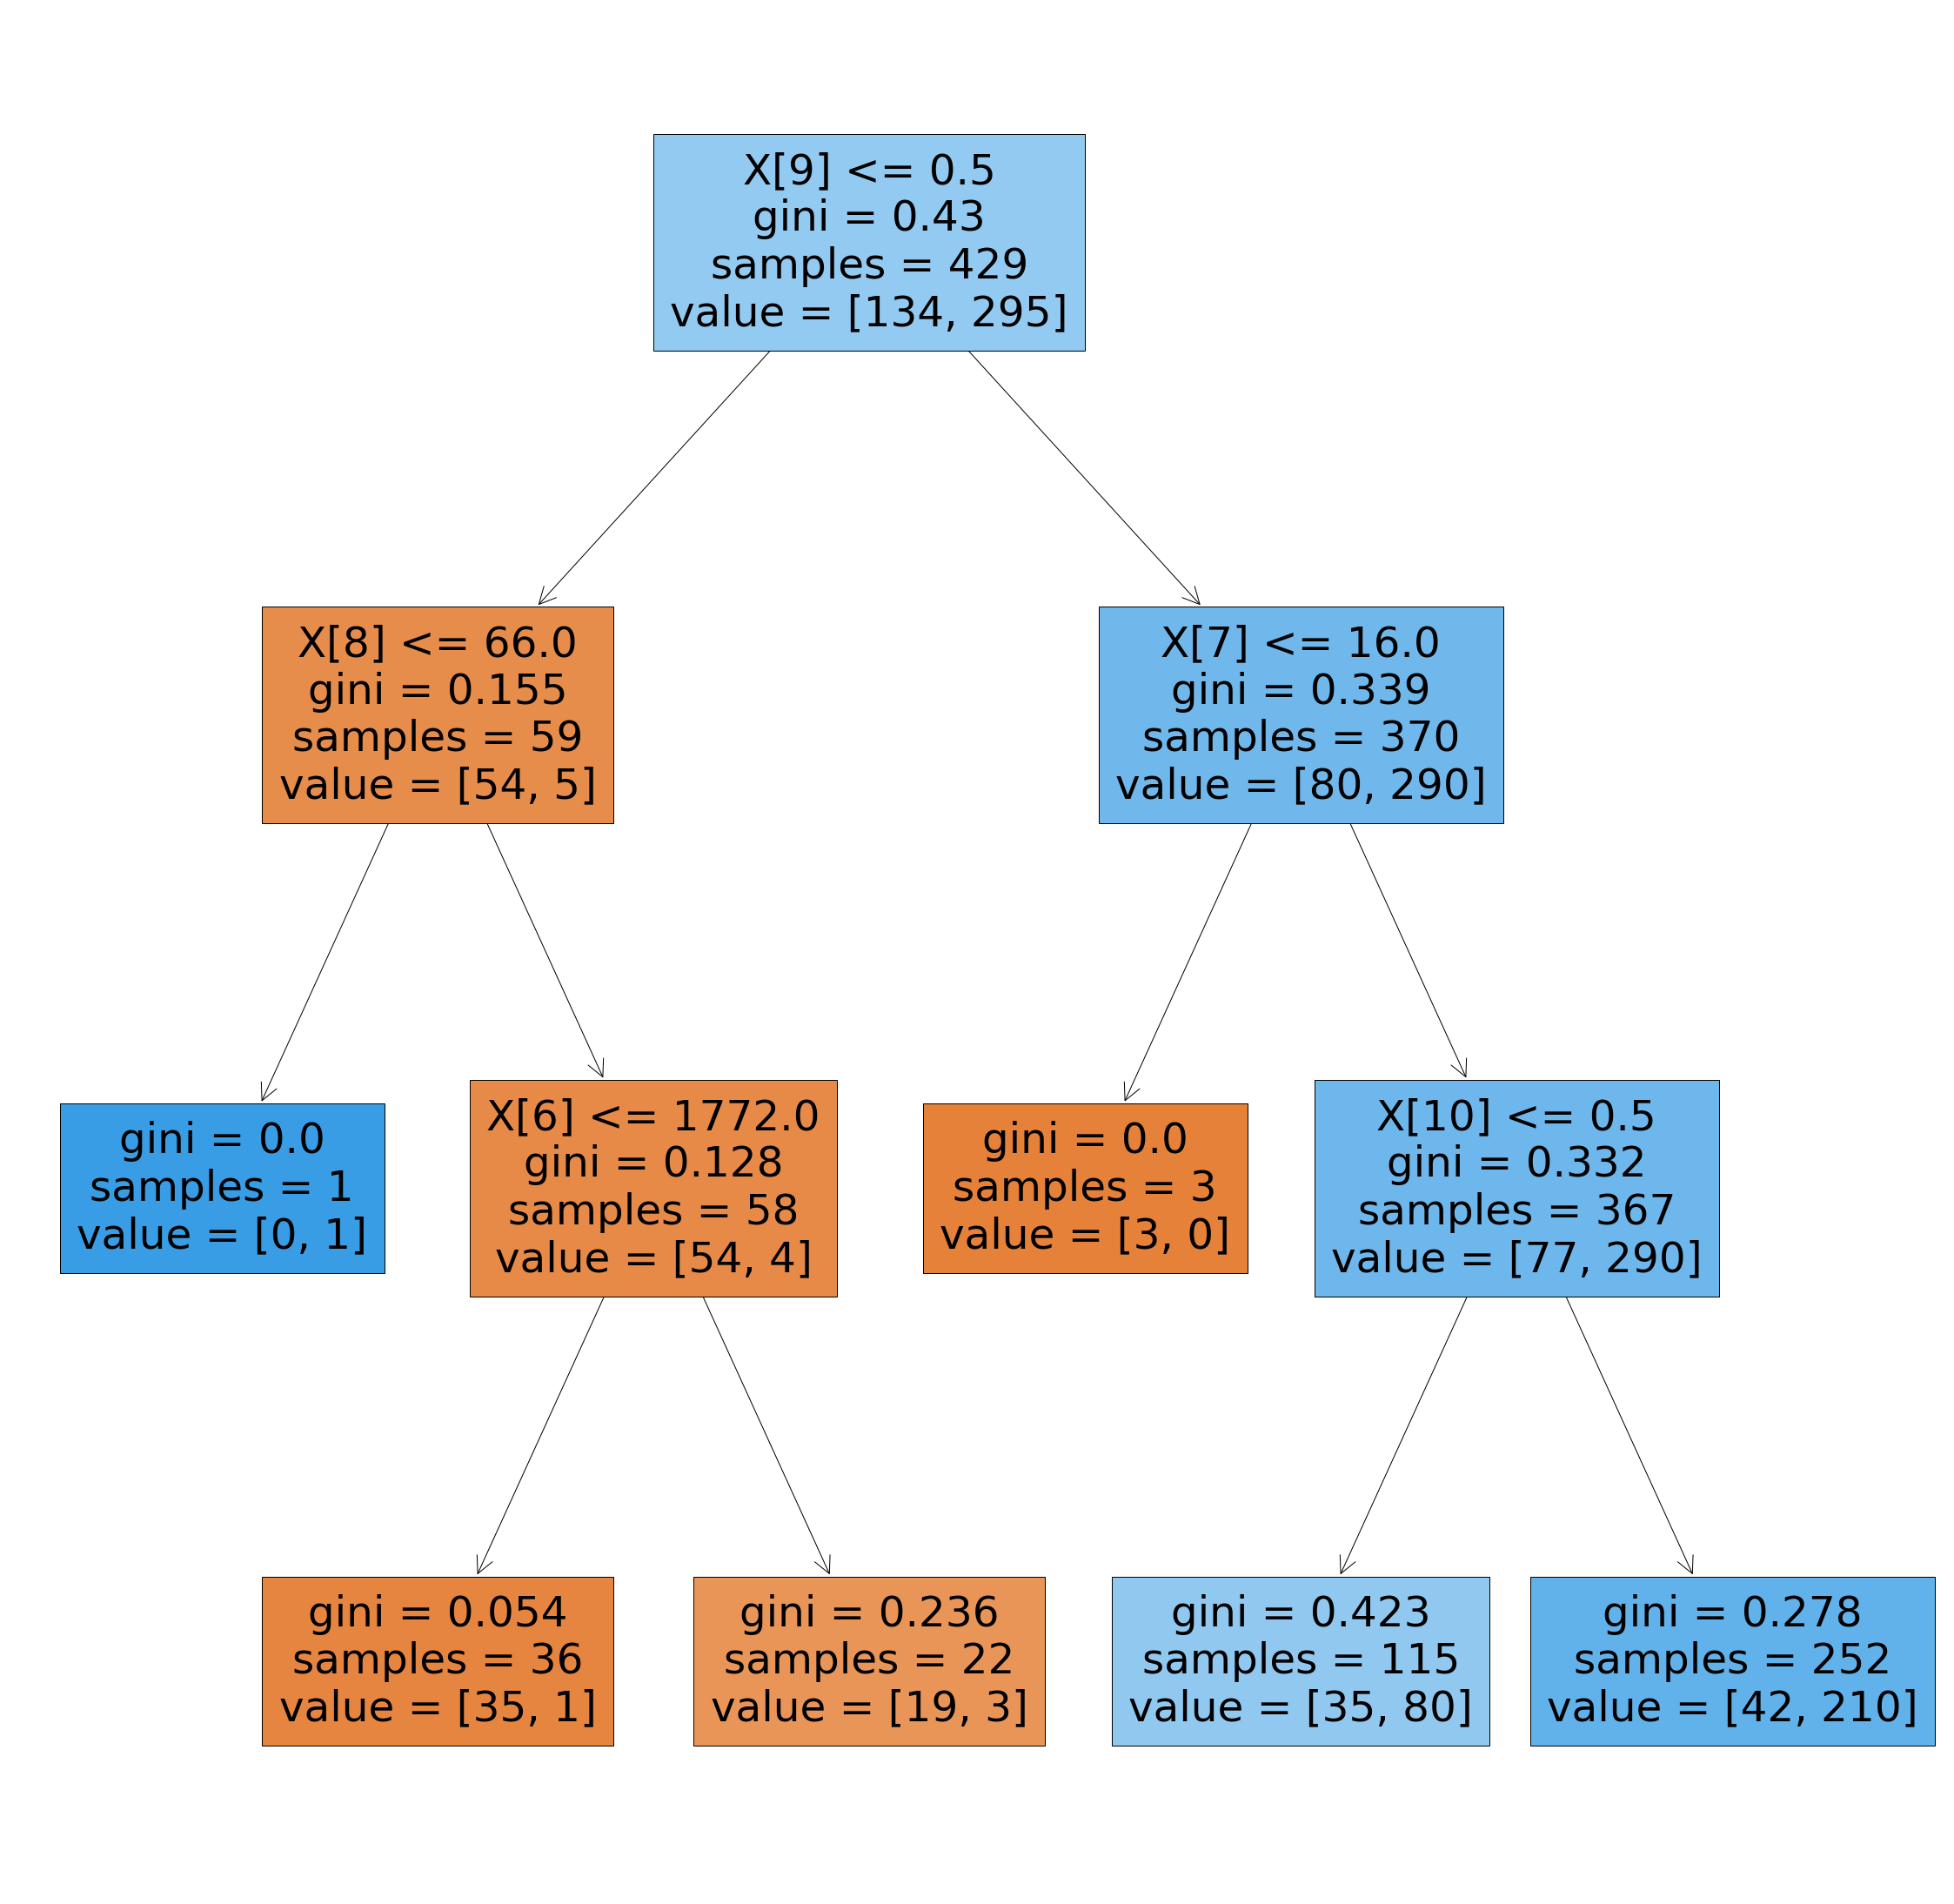

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
plot_tree(dt, filled = True);